In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


Saving serrano.png to serrano.png
Saving baboon.png to baboon.png
Saving camera_noisy_2.png to camera_noisy_2.png
Saving camera_noisy_1.png to camera_noisy_1.png
User uploaded file "serrano.png" with length 106988 bytes
User uploaded file "baboon.png" with length 651142 bytes
User uploaded file "camera_noisy_2.png" with length 147704 bytes
User uploaded file "camera_noisy_1.png" with length 251944 bytes


In [74]:
!pip install -U scikit-image


     |████████████████████████████████| 12.4MB 340kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [38]:
!pip install image-quality


     |████████████████████████████████| 153kB 2.8MB/s 
     |████████████████████████████████| 174kB 7.0MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233341 sha256=72637b153d214c77c018ef89d7626520a6434e4231a8a29377def838fe51de3f
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image 
import sys
import math
import matplotlib.image as mpimg
import pandas as pd
import time
from sklearn.metrics import mean_squared_error 
from skimage.metrics import structural_similarity as ssim
import imquality.brisque as brisque


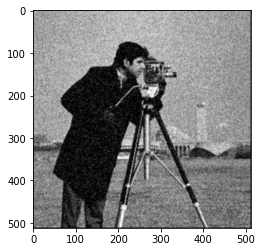

In [29]:
#Q.1.A - Denoising gsuassian noised iamge using median filter 


img_gauss= Image.open(r"/content/camera_noisy_1.png")    
image_gauss = img_gauss.convert('L')
array_gauss = np.asarray(image_gauss)

M, N = array_gauss.shape 

filtered1 = np.zeros([M, N]) 
  
for i in range(1, M-1): 
    for j in range(1, N-1): 
        temp1 = [array_gauss[i-1, j-1], array_gauss[i-1, j], 
               array_gauss[i-1, j + 1], array_gauss[i, j-1], 
               array_gauss[i, j], array_gauss[i, j + 1], 
               array_gauss[i + 1, j-1], array_gauss[i + 1, j], 
               array_gauss[i + 1, j + 1]] 
          
        temp1 = sorted(temp1) 
        filtered1[i, j]= temp1[4] #getting center pixel value only!
filtered_image1 = Image.fromarray(filtered1.astype(np.uint8) ).convert("RGB")
plt.imshow(filtered_image1)


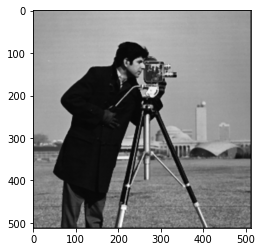

In [30]:
#Q.1.B - Denoising salt and paper noised iamge using median filter 

img2= Image.open(r"/content/camera_noisy_2.png")
image_saltnpeper = img2.convert('L')
array_saltnpeper = np.asarray(image_saltnpeper)

X, Y = array_saltnpeper.shape 

img_denoised_saltnpeper = np.zeros([X, Y]) 
  
for k in range(1, X-1): 
    for l in range(1, Y-1): 
        temp2 = [array_saltnpeper[k-1, l-1], array_saltnpeper[k-1, l], 
               array_saltnpeper[k-1, l + 1], array_saltnpeper[k, l-1], 
               array_saltnpeper[k, l], array_saltnpeper[k, l + 1], 
               array_saltnpeper[k + 1, l-1], array_saltnpeper[k + 1, l], 
               array_saltnpeper[k + 1, l + 1]] 
          
        temp2 = sorted(temp2) 
        img_denoised_saltnpeper[k, l]= temp2[4] 
  
final2 = Image.fromarray(img_denoised_saltnpeper.astype(np.uint8) ).convert("RGB")
plt.imshow(final2)

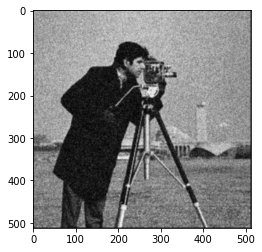

In [31]:
#Q1.C Denoising gaussian noised image using avg filter

img_gauss2= Image.open(r"/content/camera_noisy_1.png")    
image_gauss2 = img_gauss2.convert('L')
array_gauss2 = np.asarray(image_gauss2)

A, B = array_gauss2.shape 






kernel = np.ones([3, 3], dtype = int) 
kernel = kernel / 9
   
 
img_denoised2 = np.zeros([A, B]) 
  
for i in range(1, A-1): 
    for j in range(1, B-1): 
        temp = array_gauss2[i-1, j-1]*kernel[0, 0]+array_gauss2[i-1, j]*kernel[0, 1]+array_gauss2[i-1, j + 1]*kernel[0, 2]+array_gauss2[i, j-1]*kernel[1, 0]+ array_gauss2[i, j]*kernel[1, 1]+array_gauss2[i, j + 1]*kernel[1, 2]+array_gauss2[i + 1, j-1]*kernel[2, 0]+array_gauss2[i + 1, j]*kernel[2, 1]+array_gauss2[i + 1, j + 1]*kernel[2, 2] 
         
        img_denoised2[i, j]= temp
final3 = Image.fromarray(img_denoised2.astype(np.uint8) ).convert("RGB")
plt.imshow(final3)
 

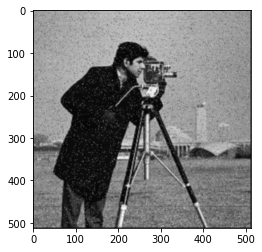

In [32]:
#Q1.D Denoising salt_&_peper noised image using avg filter

img_sp= Image.open(r"/content/camera_noisy_2.png")    
image_sp = img_sp.convert('L')
array_sp = np.asarray(image_sp)

U, V = array_sp.shape 






kernel2 = np.ones([3, 3], dtype = int) 
kernel2 = kernel2 / 9
   
 
img_denoised3 = np.zeros([U, V]) 
  
for u in range(1, U-1): 
    for v in range(1, V-1): 
        tempx = array_sp[u-1, v-1]*kernel2[0, 0]+array_sp[u-1, v]*kernel2[0, 1]+array_sp[u-1, v + 1]*kernel2[0, 2]+array_sp[u, v-1]*kernel2[1, 0]+ array_sp[u, v]*kernel2[1, 1]+array_sp[u, v + 1]*kernel2[1, 2]+array_sp[u + 1, v-1]*kernel2[2, 0]+array_sp[u + 1, v]*kernel2[2, 1]+array_sp[u + 1, v + 1]*kernel2[2, 2] 
         
        img_denoised3[u, v]= tempx
finalx = Image.fromarray(img_denoised3.astype(np.uint8) ).convert("RGB")
plt.imshow(finalx)

(512, 512, 1)


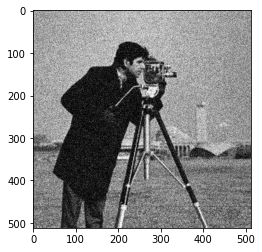

In [50]:
img = mpimg.imread("camera_noisy_1.png")

def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)


if len(img.shape) < 3:
    img.resize(*img.shape,1)

imshow(img)

print(img.shape)

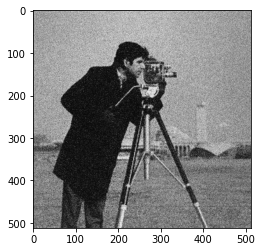

In [23]:
#Filtered images using bilateral ------> Gaussian Noise
def bfill(image, txtrr, ss, sr):
    r = int(np.ceil(3 * ss))
    
    if image.ndim == 3:
        h, w, ch = image.shape
        I = np.pad(image, ((r, r), (r, r), (0, 0)), 'symmetric').astype(np.float32)
    elif image.ndim == 2:
        h, w = image.shape
        I = np.pad(image, ((r, r), (r, r)), 'symmetric').astype(np.float32)
    else:
        print('Input image is not valid!')
        return image
    
    if txtrr.ndim == 3:
        ht, wt, cht = txtrr.shape
        if ht != h or wt != w:
            
            return image
        T = np.pad(txtrr, ((r, r), (r, r), (0, 0)), 'symmetric').astype(np.int32)
    elif txtrr.ndim == 2:
        ht, wt = txtrr.shape
        if ht != h or wt != w:
            
            return image
        T = np.pad(txtrr, ((r, r), (r, r)), 'symmetric').astype(np.int32)
   
    otpt = np.zeros_like(image)
    SF_s = 1 / (2 * ss * ss)
    SF_r = 1 / (2 * sr * sr)
    
    LXT = np.exp(-np.arange(256) * np.arange(256) * SF_r)
    
    x, y = np.meshgrid(np.arange(2 * r + 1) - r, np.arange(2 * r + 1) - r)
    kerr_s = np.exp(-(x * x + y * y) * SF_s)
    
    if I.ndim == 2 and T.ndim == 2:     
        for y in range(r, r + h):
            for x in range(r, r + w):
                weight = LXT[np.abs(T[y - r:y + r + 1, x - r:x + r + 1] - T[y, x])] * kerr_s
                otpt[y - r, x - r] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1]) / np.sum(weight)
    elif I.ndim == 3 and T.ndim == 2:     
        for y in range(r, r + h):
            for x in range(r, r + w):
                weight = LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1] - T[y, x])] * kerr_s
                wapp_xxt_xxt_xxt = np.sum(weight)
                otpt[y - r, x - r, 0] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1, 0]) / wapp_xxt_xxt_xxt
                otpt[y - r, x - r, 1] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1, 1]) / wapp_xxt_xxt_xxt
                otpt[y - r, x - r, 2] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1, 2]) / wapp_xxt_xxt_xxt
    elif I.ndim == 3 and T.ndim == 3:    
        for y in range(r, r + h):
            for x in range(r, r + w):
                weight = LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 0] - T[y, x, 0])] * \
                      LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 1] - T[y, x, 1])] * \
                      LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 2] - T[y, x, 2])] * \
                      kerr_s
                wapp_xxt_xxt_xxt = np.sum(weight)
                otpt[y - r, x - r, 0] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1, 0]) / wapp_xxt_xxt_xxt
                otpt[y - r, x - r, 1] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1, 1]) / wapp_xxt_xxt_xxt
                otpt[y - r, x - r, 2] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1, 2]) / wapp_xxt_xxt_xxt
    elif I.ndim == 2 and T.ndim == 3:     # I1T3 filter
        for y in range(r, r + h):
            for x in range(r, r + w):
                weight = LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 0] - T[y, x, 0])] * \
                      LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 1] - T[y, x, 1])] * \
                      LXT[abs(T[y - r:y + r + 1, x - r:x + r + 1, 2] - T[y, x, 2])] * \
                      kerr_s
                otpt[y - r, x - r] = np.sum(weight * I[y - r:y + r + 1, x - r:x + r + 1]) / np.sum(weight)
    else:
        
        return image

    
    return otpt


if __name__ == '__main__':
    ss = 25
    sr = 30
    img = cv2.imread('camera_noisy_1.png')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tic = time.time()
    img_bf = bfill(img, img_gray, ss, sr)
    
    plt.imshow(img_bf)

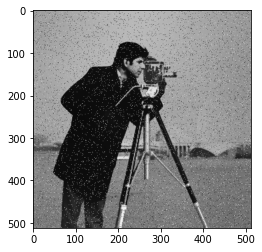

In [48]:
#Filtered images using bilateral ------> salt & peper noise image
if __name__ == '__main__':
    ss = 25
    sr = 30
    imgx = cv2.imread('camera_noisy_2.png')
    img_grayx = cv2.cvtColor(imgx, cv2.COLOR_BGR2GRAY)
    tic = time.time()
    img_bfx = blfil(imgx, img_grayx, ss, sr)
    
    plt.imshow(img_bfx)

In [59]:
#MSE for (i) gaussian noised (original img) & filtered image (median)

X_true=array_gauss.flatten()
X_predict_filtered=filtered1.flatten()
xx=mean_squared_error(X_true,X_predict_filtered) 


In [60]:
#MSE for (ii) paper and salt noised (original img) & filtered image (median)
X_true1=array_saltnpeper.flatten()
X_predict_filtered1=img_denoised_saltnpeper.flatten()
xy=mean_squared_error(X_true1,X_predict_filtered1) 

In [61]:
#MSE for (iii) gaussian noised (original img) & filtered image (mean)
X_true2=array_gauss.flatten()
X_predict_filtered2=img_denoised2.flatten()

xz=mean_squared_error(X_true2,X_predict_filtered2) 

In [62]:
#MSE for (iv) salt and peper noised (original img) & filtered image (mean)
X_true3=array_saltnpeper.flatten()
X_predict_filtered3=img_denoised3.flatten()
xxx=mean_squared_error(X_true3,X_predict_filtered3) 

In [68]:
#PSNR for (i) gaussian noised (original img) & filtered image (median)
psnr1=20*(math.log10(255/math.sqrt(xx)))
print(str(psnr1) + " dB")


16.451302001108353 dB


In [67]:
#PSNR for (ii)peper and salt(original img) & filtered image (median)
psnr2=20*(math.log10(255/math.sqrt(xy)))
print(str(psnr2) + " dB")

17.465986978959258 dB


In [69]:
#PSNR for (iii)gaussian noised(original img) & filtered image (mean)
psnr3=20*(math.log10(255/math.sqrt(xz)))
print(str(psnr3) + " dB")

16.707803045581368 dB


In [70]:
#PSNR for (iv)salt and peper noised(original img) & filtered image (mean)
psnr4=20*(math.log10(255/math.sqrt(xxx)))
print(str(psnr4) + " dB")

17.857031431930974 dB


In [19]:
#SSIM for (v) gaussian noised (original img) & filtered image(median)
s = ssim(array_gauss, filtered1)
print(s)


0.29181141101144675


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """Entry point for launching an IPython kernel.


In [20]:
#SSIM for (vi) salt and peper noised (original img) & filtered image(median)
sx=ssim(array_saltnpeper, img_denoised_saltnpeper)
print(sx)

0.3128083060297957


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """Entry point for launching an IPython kernel.


In [25]:
#SSIM for (vii) gaussian noised (original img) & filtered image(mean)
sxx=ssim(array_gauss, img_denoised2)
print(sxx)



0.29181141101144675


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


In [34]:
#SSIM for (viii) paper noised (original img) & filtered image(mean)
sxxx=ssim(array_saltnpeper, img_denoised3)
print(sxxx)

0.39149241685555175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


In [42]:
#Brisque for (ix)gaussian noised (original img) & filtered image(median)
bxx=brisque.score(filtered1)
print(bxx)

/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


39.43293468197314


In [43]:
#Brisque for (x)peper and salt noised (original img) & filtered image(median)
bxxx=brisque.score(img_denoised_saltnpeper)
print(bxxx)

/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


34.67265843286336


In [44]:
#Brisque for (xi)gaussian noised (original img) & filtered image(mean)
bxxxx=brisque.score(img_denoised2)
print(bxxxx)

/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


11.950597878924071


In [45]:
#Brisque for (xii)paper and salt noised (original img) & filtered image(mean)
bxxxxy=brisque.score(img_denoised3)
print(bxxxxy)

/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


41.190594238970306


In [46]:
#Brisque for (xiii)gaussian noised (original img) & filtered image(bilateral)
bxxxxyy=brisque.score(img_bf)
print(bxxxxyy)

/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


59.89069565724347


In [49]:
#Brisque for (xiv)salt and peper noised (original img) & filtered image(bilateral)
bxxxxyty=brisque.score(img_bfx)
print(bxxxxyty)

/usr/local/lib/python3.6/dist-packages/imquality/brisque.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


147.22154521784242
